# k-Means

## Exercise 1
k-Means on two-dimensional data with cluster separators

For the dataset below, plot the clusters and the centroids of the k-means algorithm for each iteration until convergence. The initial centroids will be the points A, D and G (therefore the algorithm will find 3 clusters). Include in each plot the Voronoi diagram for the centroids, to highlight the cluster separation.

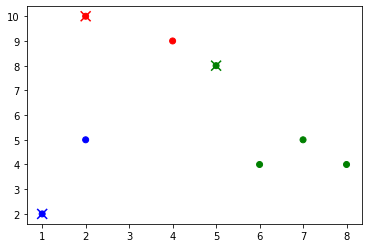

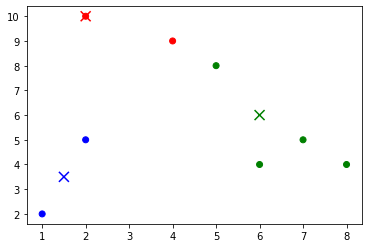

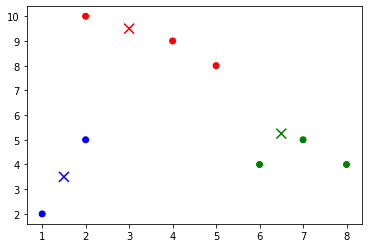

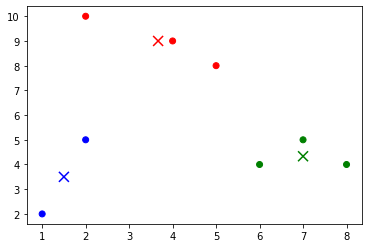

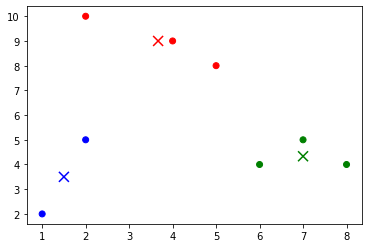

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
data = {
    'A':[2, 10], 'B':[2, 5], 'C':[8, 4], 'D':[5, 8], 
    'E':[7, 5], 'F':[6, 4],  'G':[1, 2], 'H':[4, 9]
}
d = pd.DataFrame.from_dict(data, orient='index', columns=['X', 'Y'])

centroids = {
    'A':[2, 10], 'D':[5, 8], 'G':[1, 2]
}
x_centroids = pd.DataFrame.from_dict(centroids, orient='index', columns=[0, 1])

km = KMeans(init=x_centroids, n_clusters=3, n_init=1, max_iter=1)
clusters = km.fit_predict(d)

# print(d)
# print(clusters)

for iteration in range(50):
    km = KMeans(init=x_centroids, n_clusters=3, n_init=1, max_iter=iteration)
    if iteration:
        clusters = km.fit_predict(d)
    
        if km.n_iter_ < iteration:  # Stop if KMeans converged
            break
    
        centroids = pd.DataFrame(km.cluster_centers_)
    else:
        centroids = x_centroids

    plt.figure(iteration)
    c = ListedColormap(['red', 'green', 'blue'])
    plt.scatter(d["X"], d["Y"], c=clusters, cmap=c)
    plt.scatter(centroids[0], centroids[1], s=100, marker='x', 
                c=range(len(x_centroids)), cmap=c)
    plt.show()

## Exercise 2
k-Means on two-dimensional data

For the dataset below and the initial centroids A, D and G, independently implement the k-Means algorithm and plot the clusters and centroids for each iteration.

In [2]:
import pandas as pd
data = {
    'A':[2, 10], 'B':[2, 5], 'C':[8, 4], 'D':[5, 8], 
    'E':[7, 5], 'F':[6, 4],  'G':[1, 2], 'H':[4, 9]
}
d = pd.DataFrame.from_dict(data, orient='index', columns=['X', 'Y'])



## Exercise 3
k-Means on an external dataset with starting centroids

Apply k-means on this [two-dimensional dataset](https://profs.info.uaic.ro/~ciortuz/ML.ex-book/res/CMU.2004f.TM+AM.HW3.pr5.cl.dat) using these [starting centroids](https://profs.info.uaic.ro/~ciortuz/ML.ex-book/res/CMU.2004f.TM+AM.HW3.pr5.init.dat). Plot the clusters and centroids after each iteration until convergence. What is unusual about about the first iteration?

## Exercise 4
Anisotropically distributed data

Run the k-means algorithm for the datasets `d1` and `d2` with $k=3$ and the default parameters. 
1. Plot the resulting clusters.
1. Which clusters look more 'natural' and why?

In [3]:
from sklearn.datasets import make_blobs
import numpy as np

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
# Anisotropically distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
anis = np.dot(X, transformation)
# Compare these datasets
d1, d2 = X, anis

## Exercise 5
k-means and noise

Considering the dataset `d` below and two sets of starting centroids `c1` and `c2`.

1. Run k-means ($k=3$ and the default parameters), first starting with `c1` and then starting with `c2`. (You might want to also use `n_init=1` to prevent a warning.)
1. Plot the resulting clusters for each of the two runs.
1. In which of the two runs the clusters look more 'natural' and why?

Initial centroids: [[ -6   2]
 [-10  15]
 [  3   3]]


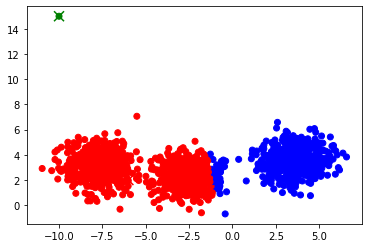

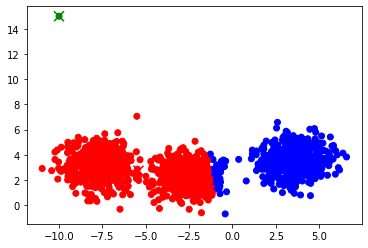

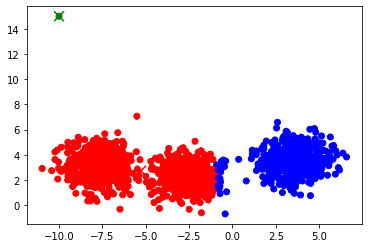

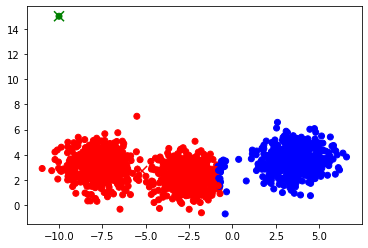

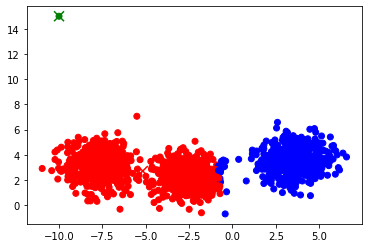

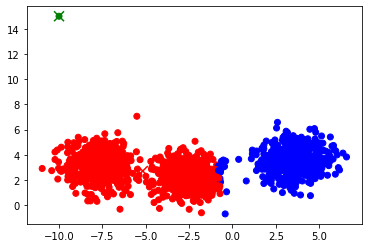

Initial centroids: [[-10   3]
 [ -2   2]
 [  3   3]]


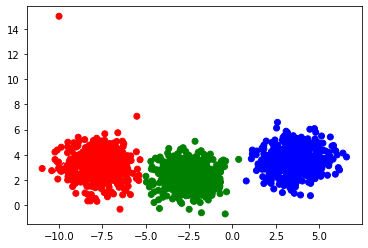

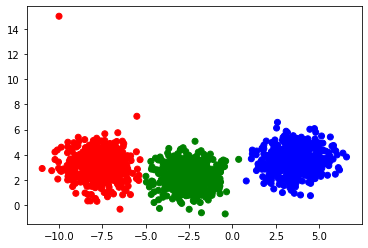

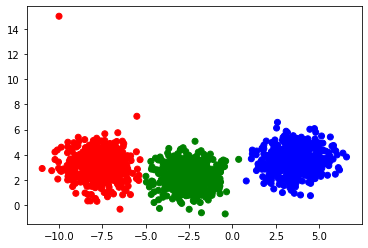

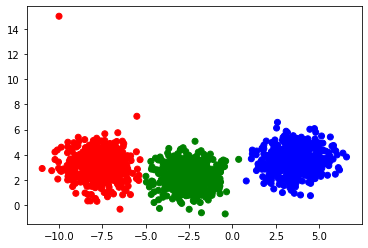

In [45]:
from sklearn.datasets import make_blobs
import numpy as np

n_samples = 1500
random_state = 110
d, _ = make_blobs(n_samples=n_samples, random_state=random_state)
# Dataset
d = np.append(d, [[-10, 15]], axis=0)

# Starting centroids
c1 = np.array([[-6, 2], [-10, 15], [3, 3]])
c2 = np.array([[-10, 3], [-2, 2], [3, 3]])

plt_figure = 0
for init_centroids in [c1, c2]:
    print("Initial centroids:", init_centroids)
    km = KMeans(init=init_centroids, n_clusters=3, n_init=1, max_iter=1)
    clusters = km.fit_predict(d)

    # print(d)
    # print(clusters)

    for iteration in range(50):
        km = KMeans(init=init_centroids, n_clusters=3, n_init=1, max_iter=iteration)
        if iteration:
            clusters = km.fit_predict(d)

            if km.n_iter_ < iteration:  # Stop if KMeans converged
                break

            centroids = np.array(km.cluster_centers_)
        else:
            centroids = init_centroids

        plt.figure(plt_figure)
        plt_figure += 1
        c = ListedColormap(['red', 'green', 'blue'])
        plt.scatter(d[:,0], d[:,1], c=clusters, cmap=c)
        plt.scatter(centroids[:,0], centroids[:,1], s=100, marker='x', 
                    c=range(len(init_centroids)), cmap=c)
        plt.show()